In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Conv2D,Dense,MaxPooling2D,Flatten,Input
from tensorflow.keras import Model,Sequential
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import image
from tensorflow.image import rgb_to_grayscale
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt

In [ ]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print("Number of image in train set :-",X_train.shape[0])
print("Number of image in test set :-",X_test.shape[0])
print("Resolution of image :-",X_train.shape[1],'*',X_train.shape[2])

Number of image in train set :- 60000
Number of image in test set :- 10000
Resolution of image :- 28 * 28


In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
X_train = X_train.astype('float32').reshape((X_train.shape[0], 784))
X_test = X_test.astype('float32').reshape((X_test.shape[0], 784))

In [ ]:
input_img = Input(shape=(784,))
layer_1 = Dense(100,activation='relu')(input_img)
layer_2 = Dense(10,activation='relu')(layer_1)
layer_3 = Dense(100,activation='relu')(layer_2)
output = Dense(784,activation='relu')(layer_3)

In [ ]:
model = Model(inputs=input_img,outputs=output)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               1100      
_________________________________________________________________
dense_3 (Dense)              (None, 784)               79184     
Total params: 159,794
Trainable params: 159,794
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,X_train,epochs=150,batch_size=32,validation_data=(X_test,X_test))

Epoch 1/150
1875/1875 [==============================] - 7s 2ms/step - loss: 0.0407 - accuracy: 0.0097 - val_loss: 0.0275 - val_accuracy: 0.0096
Epoch 2/150
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0273 - accuracy: 0.0092 - val_loss: 0.0257 - val_accuracy: 0.0111
Epoch 3/150
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0256 - accuracy: 0.0100 - val_loss: 0.0247 - val_accuracy: 0.0084
Epoch 4/150
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0246 - accuracy: 0.0113 - val_loss: 0.0234 - val_accuracy: 0.0132
Epoch 5/150
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0235 - accuracy: 0.0110 - val_loss: 0.0227 - val_accuracy: 0.0140
Epoch 6/150
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0228 - accuracy: 0.0117 - val_loss: 0.0223 - val_accuracy: 0.0131
Epoch 7/150
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0225 - accuracy: 0.0115 - val_loss: 0.0221 - val_ac

In [ ]:
sample1 = X_train[0].reshape(28,28)

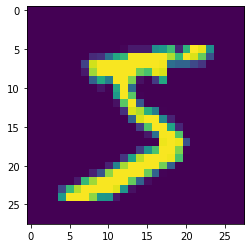

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(sample1)

In [ ]:
decoderop_sample1 = model.predict(X_train[0].reshape(1,-1)).reshape(28,28)

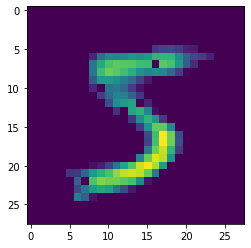

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(decoderop_sample1)

In [ ]:
#autoencoder 1
input_img = Input(shape=(784,))
en1 = Dense(200,activation='relu')(input_img)
code1 = Dense(100,activation='relu')(en1)
de1 = Dense(200,activation='relu')(code1)
output1 = Dense(784,activation='relu')(de1)

model1 = Model(inputs=input_img,outputs=output1)
model1.compile(optimizer='adam',loss='mse')
history1 = model1.fit(X_train,X_train,epochs=150,batch_size=32,validation_data=(X_test,X_test))

Epoch 1/150
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0237 - val_loss: 0.0101
Epoch 2/150
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0100 - val_loss: 0.0089
Epoch 3/150
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0090 - val_loss: 0.0085
Epoch 4/150
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0087 - val_loss: 0.0083
Epoch 5/150
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0085 - val_loss: 0.0082
Epoch 6/150
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0083 - val_loss: 0.0082
Epoch 7/150
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0083 - val_loss: 0.0080
Epoch 8/150
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0082 - val_loss: 0.0080
Epoch 9/150
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0082 - val_loss: 0.0079
Epoch 10/150
1875/1875 [==============================] - 3s 2ms/step - l

In [ ]:
model1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_4 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_5 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_6 (Dense)              (None, 200)               20200     
_________________________________________________________________
dense_7 (Dense)              (None, 784)               157584    
Total params: 354,884
Trainable params: 354,884
Non-trainable params: 0
_________________________________________________________________


In [ ]:
intermediate_layer_model = Model(inputs=model1.input, 
                                 outputs=model1.get_layer("dense_5").output)

In [ ]:
code1_train = intermediate_layer_model.predict(X_train)
code1_test = intermediate_layer_model.predict(X_test)

In [ ]:
#autoencoder 1
input_img2 = Input(shape=(100,))
en2 = Dense(50,activation='relu')(input_img2)
output2 = Dense(100,activation='relu')(en2)

model2 = Model(inputs=input_img2,outputs=output2)
model2.summary()
model2.compile(optimizer='adam',loss='mse')


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
dense_8 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_9 (Dense)              (None, 100)               5100      
Total params: 10,150
Trainable params: 10,150
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history2 = model2.fit(code1_train,code1_train,epochs=50,batch_size=32,validation_data=(code1_test,code1_test))

Epoch 1/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1907 - val_loss: 0.0840
Epoch 2/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0839 - val_loss: 0.0780
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0795 - val_loss: 0.0769
Epoch 4/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0788 - val_loss: 0.0753
Epoch 5/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0768 - val_loss: 0.0738
Epoch 6/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0752 - val_loss: 0.0736
Epoch 7/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0750 - val_loss: 0.0732
Epoch 8/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0749 - val_loss: 0.0732
Epoch 9/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0747 - val_loss: 0.0733
Epoch 10/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.074

In [ ]:
intermediate_layer_model2 = Model(inputs=model2.input, 
                                 outputs=model2.get_layer("dense_8").output)

In [ ]:
intermediate_layer_model2.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
dense_8 (Dense)              (None, 50)                5050      
Total params: 5,050
Trainable params: 5,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
code2_train = intermediate_layer_model2.predict(code1_train)
code2_test = intermediate_layer_model2.predict(code1_test)

In [ ]:
code2_train.shape

(60000, 50)

In [ ]:
#autoencoder 1
input_img3 = Input(shape=(50,))
en3 = Dense(30,activation='relu')(input_img3)
output3 = Dense(50,activation='relu')(en3)

model3 = Model(inputs=input_img3,outputs=output3)
model3.summary()
model3.compile(optimizer='adam',loss='mse')


Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
dense_10 (Dense)             (None, 30)                1530      
_________________________________________________________________
dense_11 (Dense)             (None, 50)                1550      
Total params: 3,080
Trainable params: 3,080
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history3 = model3.fit(code2_train,code2_train,epochs=100,batch_size=32,validation_data=(code2_test,code2_test))

Epoch 1/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0492 - val_loss: 0.0092
Epoch 2/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0091 - val_loss: 0.0082
Epoch 3/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0084 - val_loss: 0.0080
Epoch 4/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0078 - val_loss: 0.0072
Epoch 5/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0074 - val_loss: 0.0071
Epoch 6/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0073 - val_loss: 0.0071
Epoch 7/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0072 - val_loss: 0.0071
Epoch 8/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0073 - val_loss: 0.0070
Epoch 9/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0073 - val_loss: 0.0071
Epoch 10/100
1875/1875 [==============================] - 3s 1ms/step - l

In [ ]:
decoder_input1 = Input(shape = (100,))
next_layer = decoder_input1
for layer in model1.layers[-2:]:
    next_layer = layer(next_layer)
 
decoder1 = Model(decoder_input1, next_layer)


In [ ]:
decoder1.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
dense_6 (Dense)              (None, 200)               20200     
_________________________________________________________________
dense_7 (Dense)              (None, 784)               157584    
Total params: 177,784
Trainable params: 177,784
Non-trainable params: 0
_________________________________________________________________


In [ ]:
decoder_input2 = Input(shape = (50,))
next_layer2 = decoder_input2
for layer in model2.layers[-1:]:
    next_layer2 = layer(next_layer2)
 
decoder2 = Model(decoder_input2, next_layer2)
decoder2.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)               5100      
Total params: 5,100
Trainable params: 5,100
Non-trainable params: 0
_________________________________________________________________


In [ ]:
sample = X_train[0].reshape(1,-1)
sample = intermediate_layer_model.predict(sample)#100
sample = intermediate_layer_model2.predict(sample)#50
sample = model3.predict(sample)#50
sample = decoder2.predict(sample)
sample = decoder1.predict(sample)

In [ ]:
sample = sample.reshape(28,28)

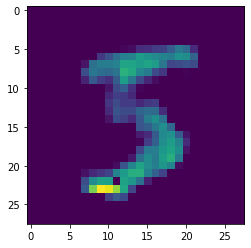

In [ ]:
plt.imshow(sample)

In [ ]:
intermediate_layer_model3 = Model(inputs=model3.input, 
                                 outputs=model3.get_layer("dense_10").output)

In [ ]:
intermediate_layer_model3.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
dense_10 (Dense)             (None, 30)                1530      
Total params: 1,530
Trainable params: 1,530
Non-trainable params: 0
_________________________________________________________________


In [ ]:
latent_code_train = intermediate_layer_model3.predict(code2_train)
latent_code_test = intermediate_layer_model3.predict(code2_test)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=3, random_state=0).fit(latent_code_train, y_train)

In [ ]:
clf.score(latent_code_test,y_test)

0.8919

In [ ]:
intermediate_layer_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_4 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_5 (Dense)              (None, 100)               20100     
Total params: 177,100
Trainable params: 177,100
Non-trainable params: 0
_________________________________________________________________


In [ ]:
fine_tuning = Sequential()


In [ ]:
fine_tuning.add(intermediate_layer_model)
for i in intermediate_layer_model2.layers[1:]:
  fine_tuning.add(i)
for i in intermediate_layer_model3.layers[1:]:
  fine_tuning.add(i)
fine_tuning.add(Dense(10,activation='softmax'))

In [ ]:
fine_tuning.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_2 (Functional)         (None, 100)               177100    
_________________________________________________________________
dense_8 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_10 (Dense)             (None, 30)                1530      
_________________________________________________________________
dense_13 (Dense)             (None, 10)                310       
Total params: 183,990
Trainable params: 183,990
Non-trainable params: 0
_________________________________________________________________


In [ ]:
fine_tuning.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [ ]:
y_train_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
fine_tuning.fit(X_train,y_train_cat,epochs=50,batch_size=32,validation_data=(X_test,y_test_cat))

Epoch 1/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5072 - accuracy: 0.8431 - val_loss: 0.1254 - val_accuracy: 0.9618
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1042 - accuracy: 0.9685 - val_loss: 0.0961 - val_accuracy: 0.9714
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0692 - accuracy: 0.9787 - val_loss: 0.0800 - val_accuracy: 0.9762
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0483 - accuracy: 0.9845 - val_loss: 0.0816 - val_accuracy: 0.9761
Epoch 5/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0372 - accuracy: 0.9879 - val_loss: 0.0849 - val_accuracy: 0.9772
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0307 - accuracy: 0.9908 - val_loss: 0.0885 - val_accuracy: 0.9764
Epoch 7/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0286 - accuracy: 0.9905 - val_loss: 0.0835 - val_accuracy: